12. What is the average number of games per set in men's matches compared to women's 
matches?

In [ ]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent

proc_dir = project_root / "data" / "processed"
proc_dir_v2 = project_root / "data" / "processed" / "v2"

answers_dir = project_root / "reports" / "answers"
answers_dir.mkdir(parents=True, exist_ok=True)

df_matches = pd.read_parquet(proc_dir / "match_results_player_filled.parquet")
df_games = pd.read_parquet(proc_dir_v2 / "game_clean_v2.parquet")

# حذف تکراری‌ها در مسابقات برای جلوگیری از چندبار شمردن جنسیت
df_matches = df_matches.drop_duplicates(subset=["match_id"])

# تعیین جنسیت مسابقه
def determine_gender(row):
    if row["gender_home"] == "M" and row["gender_away"] == "M":
        return "M"
    elif row["gender_home"] == "F" and row["gender_away"] == "F":
        return "F"
    return None

df_matches["match_gender"] = df_matches.apply(determine_gender, axis=1)
df_matches = df_matches[df_matches["match_gender"].notna()]

games_per_set = (
    df_games.groupby(["match_id", "set_id"])["game_id"]
    .nunique()
    .reset_index(name="num_games")
)

# ادغام با جنسیت
df_final = games_per_set.merge(
    df_matches[["match_id", "match_gender"]], on="match_id", how="left"
)

# محاسبه میانگین تعداد بازی در هر ست بر حسب جنسیت
result = (
    df_final.groupby("match_gender")["num_games"]
    .mean()
    .reset_index()
    .rename(columns={"match_gender": "Gender", "num_games": "Average Games per Set"})
)

csv_path = answers_dir / "q12_avg_games_per_set_by_gender.csv"
result.to_csv(csv_path, index=False, encoding="utf-8-sig")
print(f"CSV saved to: {csv_path}")

result


CSV saved to: c:\Users\mit\Desktop\Final_Project\reports\answers\q12_avg_games_per_set_by_gender.csv


,Gender,Average Games per Set
0,F,9.052212
1,M,9.443265


Chart:

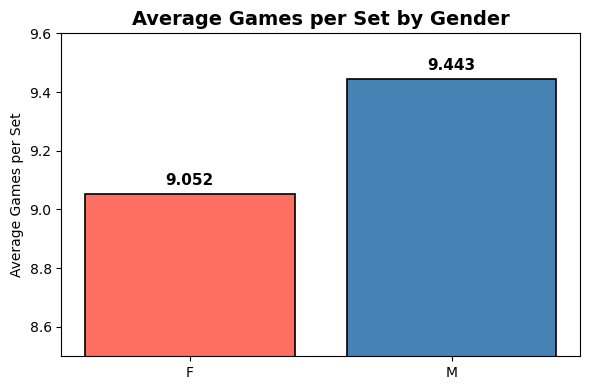

Chart saved to: c:\Users\mit\Desktop\Final_Project\reports\figures\q12_avg_games_per_set_by_gender.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent
figures_dir = project_root / "reports" / "figures"
figures_dir.mkdir(parents=True, exist_ok=True)

csv_path = project_root / "reports" / "answers" / "q12_avg_games_per_set_by_gender.csv"
result = pd.read_csv(csv_path)

color_map = {"M": "#4682B4",
             "F": "#FF6F61"}
colors = [color_map[g] for g in result["Gender"]]

y_min, y_max = 8.5, 9.6

plt.figure(figsize=(6,4))
bars = plt.bar(
    result["Gender"],
    result["Average Games per Set"],
    color=colors,
    edgecolor='black',
    linewidth=1.2
)
plt.title("Average Games per Set by Gender", fontsize=14, fontweight="bold")
plt.ylabel("Average Games per Set")
plt.ylim(y_min, y_max)

for bar, val in zip(bars, result["Average Games per Set"]):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        val + 0.02,
        f"{val:.3f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
fig_path = figures_dir / "q12_avg_games_per_set_by_gender.png"
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

print(f"Chart saved to: {fig_path}")
